### Web Cam Images

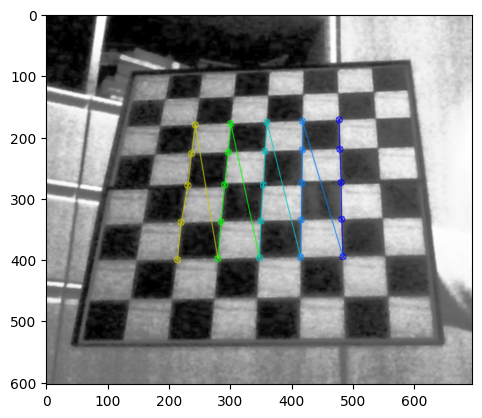

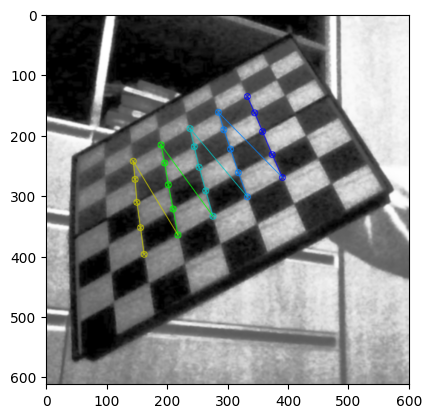

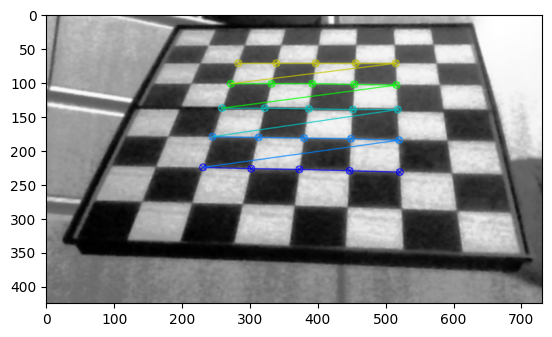

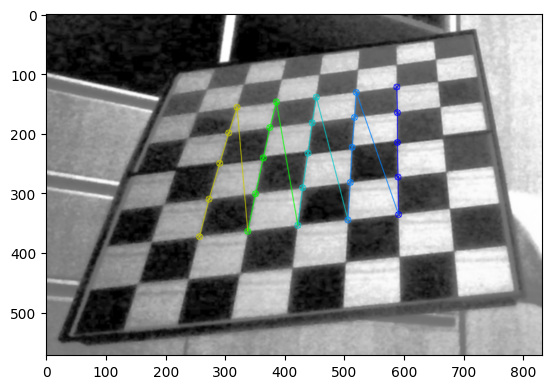

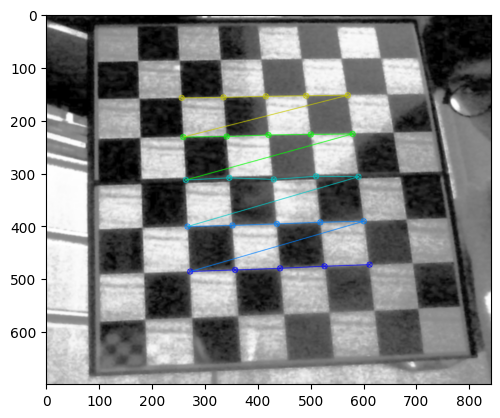

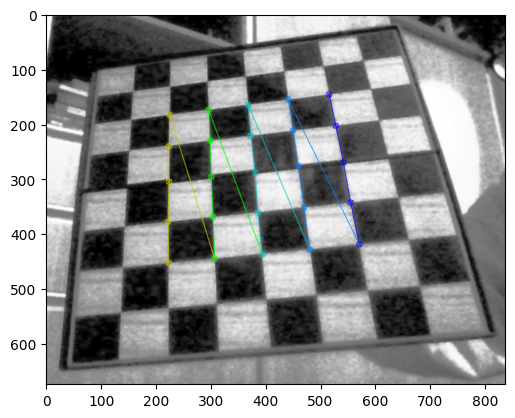

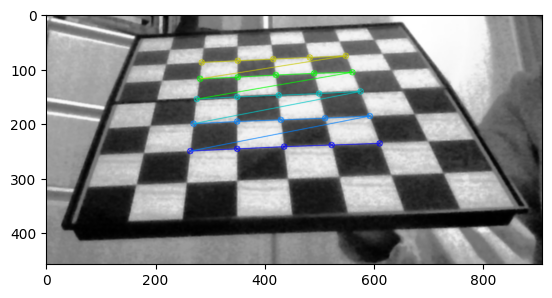

In [35]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((5*5,3), np.float32)
objp[:,:2] = np.mgrid[0:5,0:5].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('./img/input/*.jpg')

for fname in images:
    img = cv.imread(fname)
    
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.equalizeHist(img)
    img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    
    img = cv.GaussianBlur(img, (5, 5), 0)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (5,5), None, flags=cv.CALIB_CB_ADAPTIVE_THRESH +
                                                                    cv.CALIB_CB_FAST_CHECK +
                                                                    cv.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (5,5), corners2, ret)
        plt.imshow(img)
        plt.show()


### Calibrate Camera

In [2]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [7]:
for img_path in images:
    img = cv.imread(img_path)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    cv.imwrite(img_path.replace('input', 'output'), dst)

### Testing other images

['./imgs/leftcamera/Im_L_1.png', './imgs/leftcamera/Im_L_10.png', './imgs/leftcamera/Im_L_13.png', './imgs/leftcamera/Im_L_15.png', './imgs/leftcamera/Im_L_19.png', './imgs/leftcamera/Im_L_2.png', './imgs/leftcamera/Im_L_20.png', './imgs/leftcamera/Im_L_4.png', './imgs/leftcamera/Im_L_6.png', './imgs/leftcamera/Im_L_9.png', './imgs/leftcamera/Im_R_11.png', './imgs/leftcamera/Im_R_12.png', './imgs/leftcamera/Im_R_14.png', './imgs/leftcamera/Im_R_16.png', './imgs/leftcamera/Im_R_18.png', './imgs/leftcamera/Im_R_19.png', './imgs/leftcamera/Im_R_2.png', './imgs/leftcamera/Im_R_20.png', './imgs/leftcamera/Im_R_4.png', './imgs/leftcamera/Im_R_8.png']


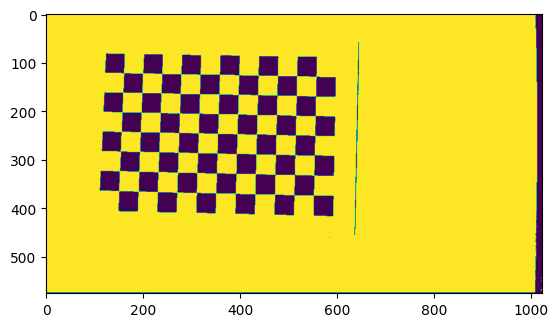

False


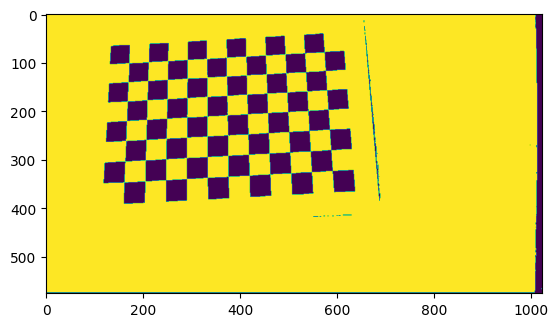

False


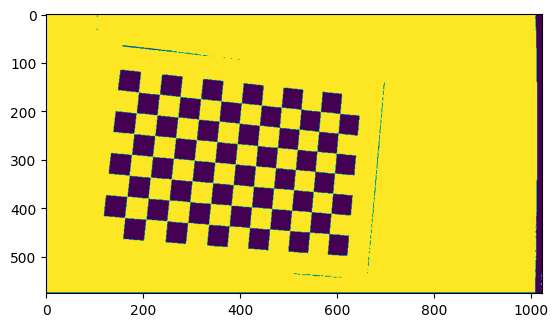

False


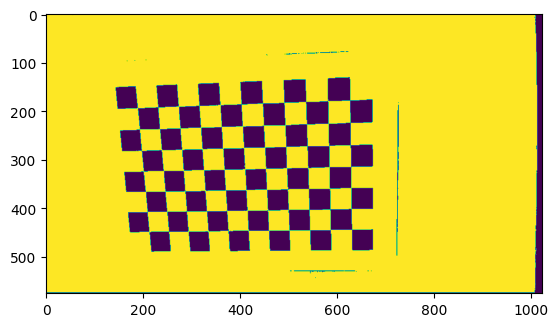

False


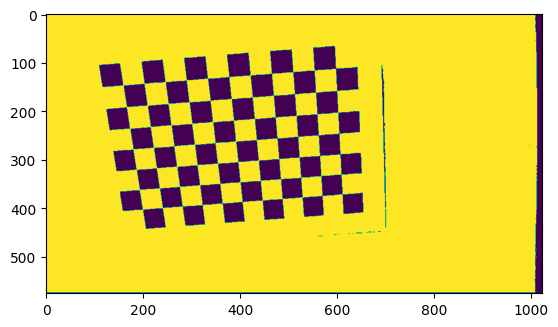

False


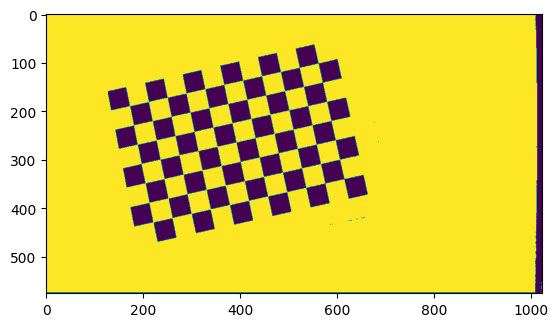

False


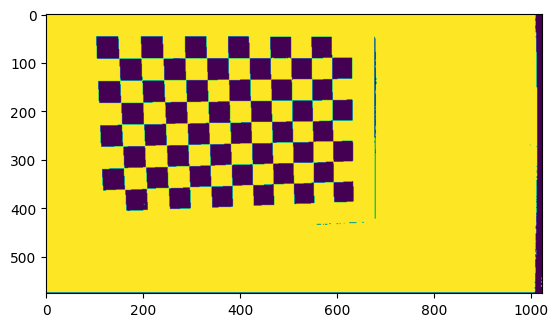

False


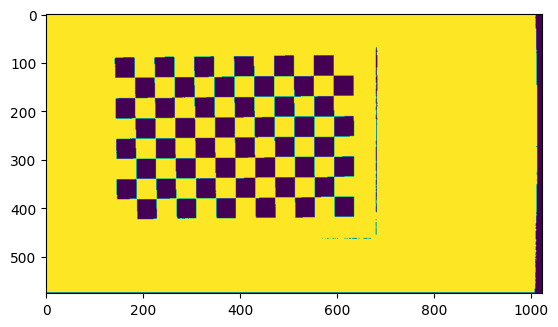

False


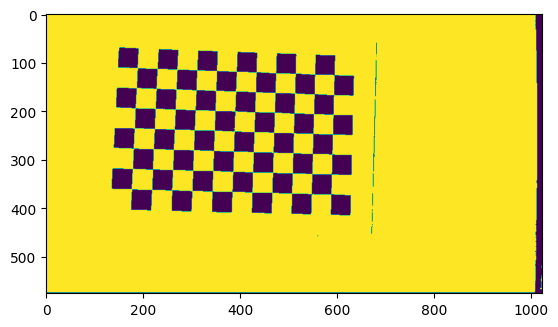

False


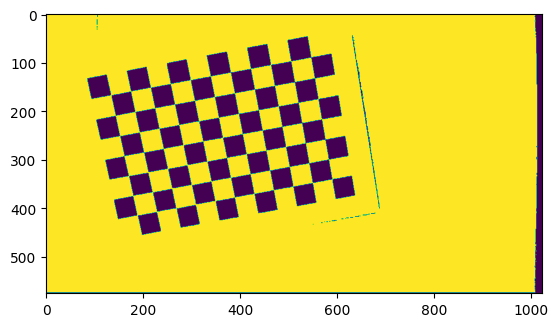

False


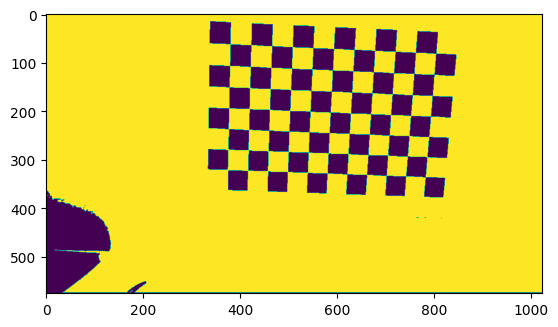

False


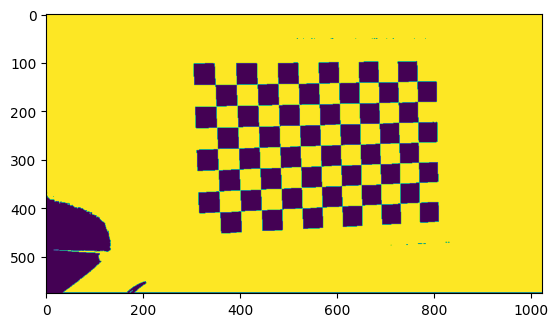

False


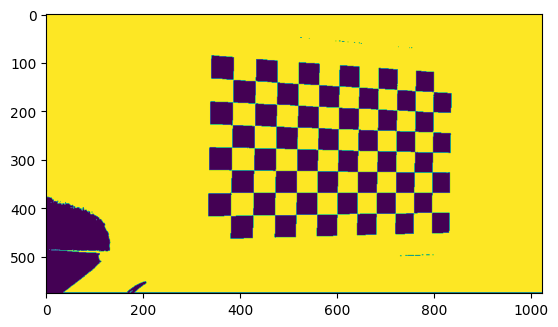

False


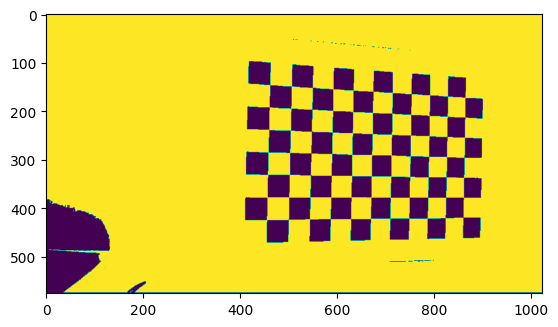

False


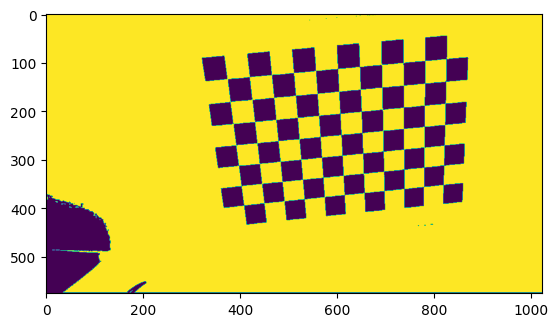

False


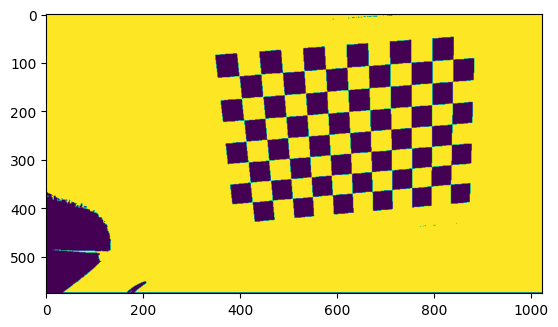

False


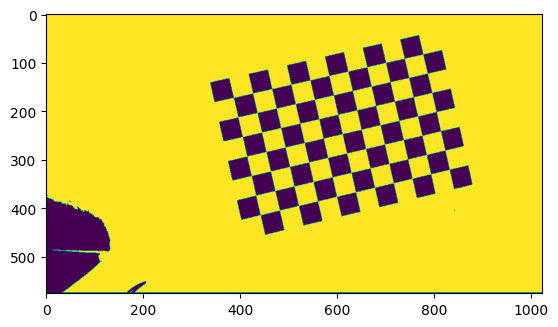

False


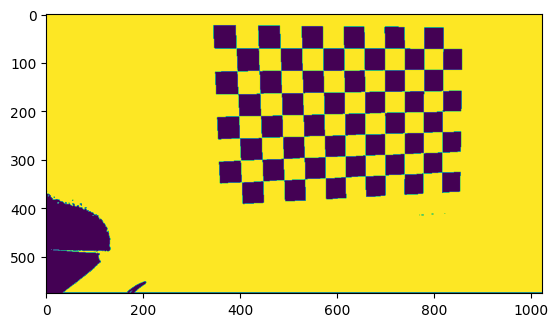

False


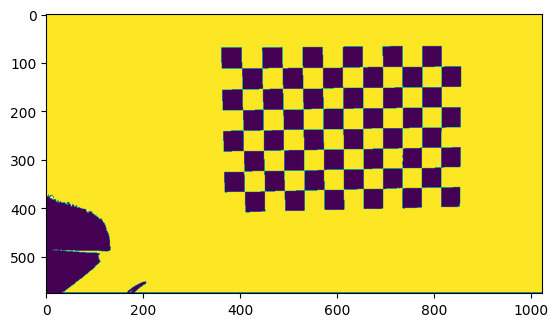

False


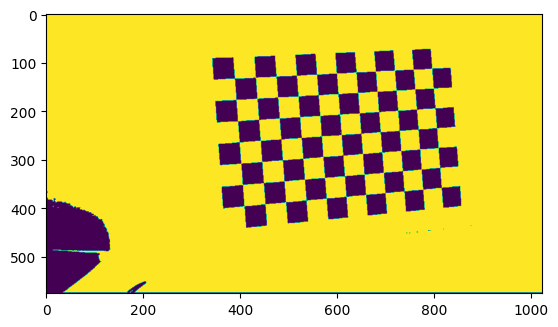

False


In [32]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((11*7,3), np.float32)
objp[:,:2] = np.mgrid[0:11,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('./imgs/input/*.png')

print(images)

for fname in images:

    # Carrega a imagem
    img = cv.imread(fname)

    # Converte a imagem para o espaço de cor HSL
    hsl = cv.cvtColor(img, cv.COLOR_BGR2HLS)

    # Extrai a componente de Lightness (L)
    L = hsl[:,:,1]

    # Aplica a binarização de Otsu na componente L
    _, thresh = cv.threshold(L,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


    plt.imshow(thresh)
    plt.show()

    ret, corners = cv.findChessboardCorners(thresh, (4,4), None, flags=cv.CALIB_CB_ADAPTIVE_THRESH |
                                                                   cv.CALIB_CB_NORMALIZE_IMAGE |
                                                                   cv.CALIB_CB_FAST_CHECK)
        
    print(ret) 
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(thresh, corners, (11,7), (-1,-1), criteria)
        imgpoints.append(corners2)
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (11, 7), corners2, ret)
        plt.imshow(img)
        plt.show()


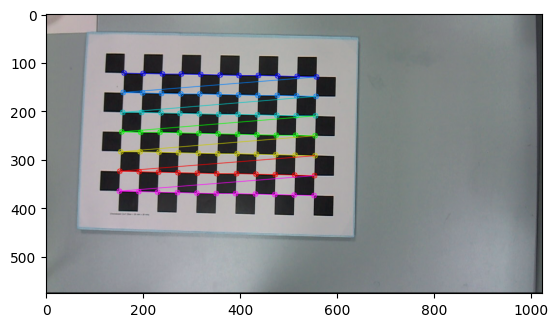

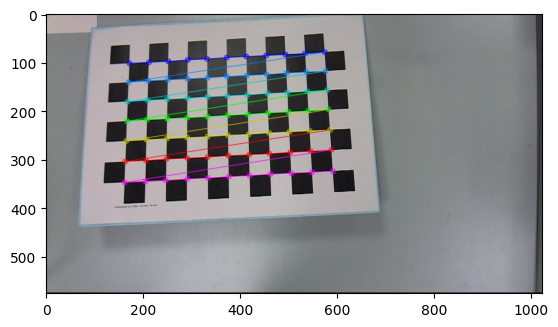

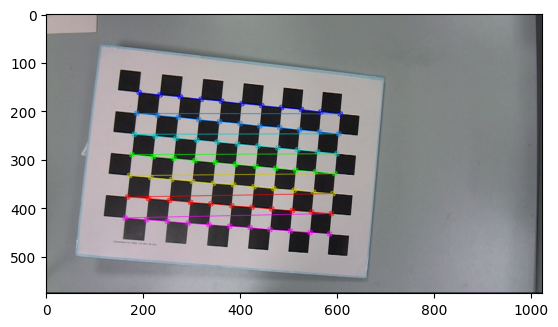

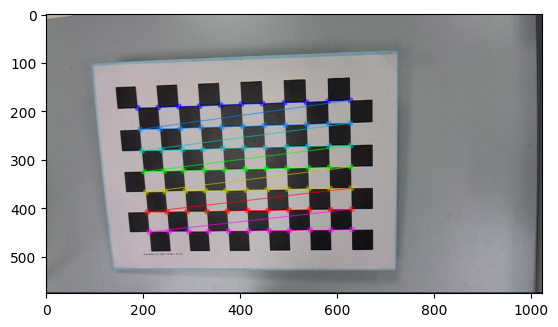

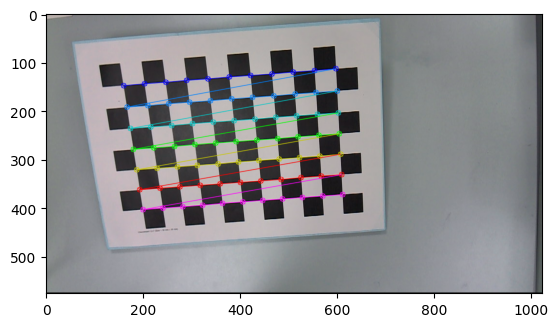

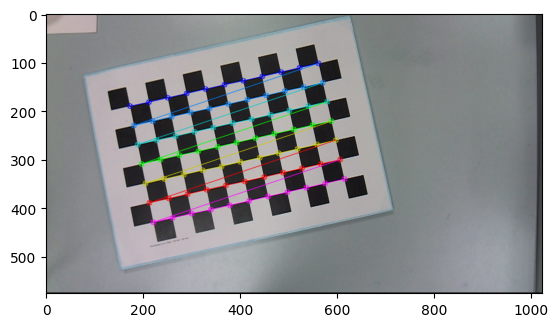

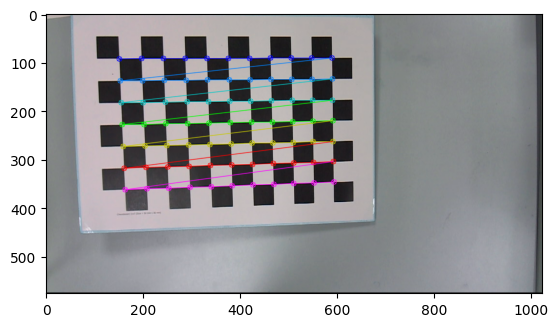

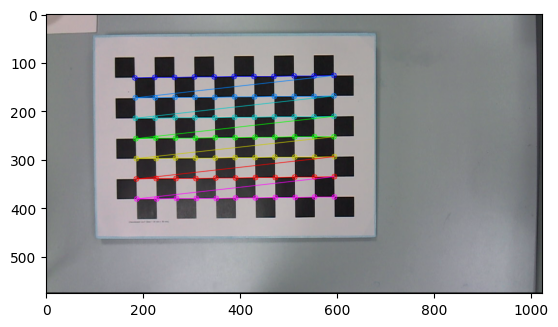

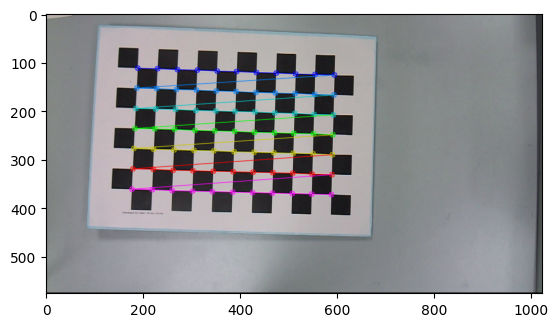

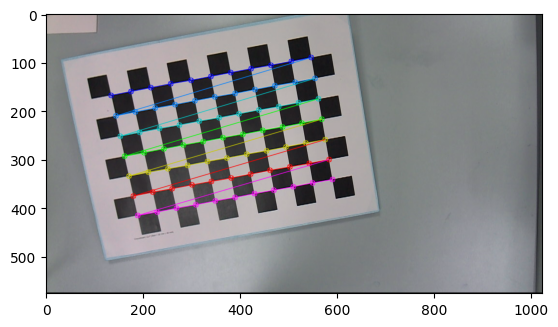

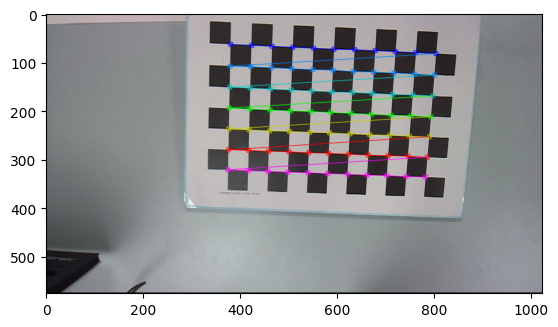

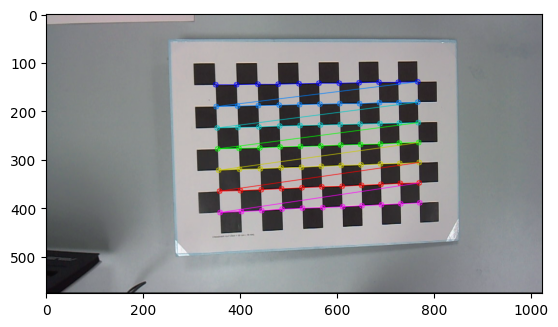

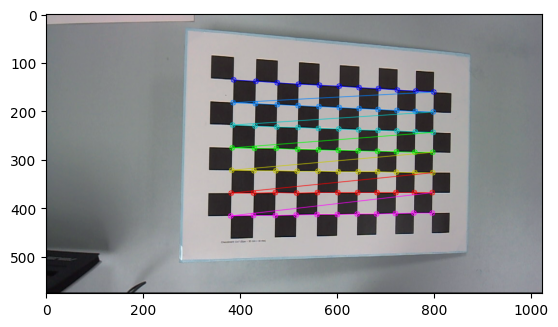

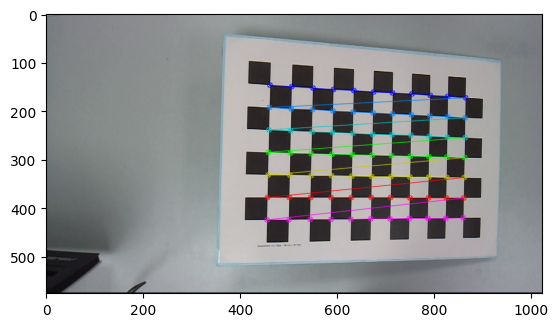

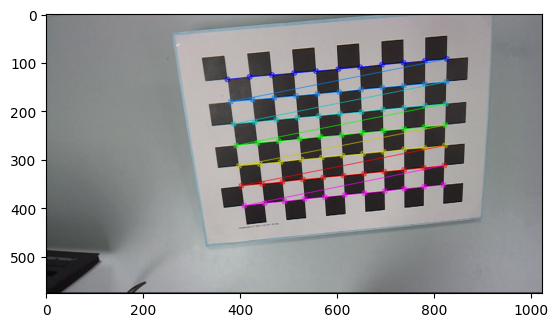

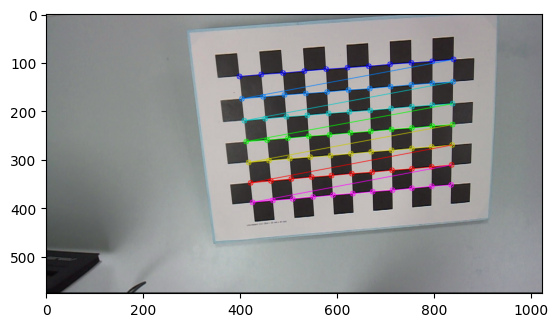

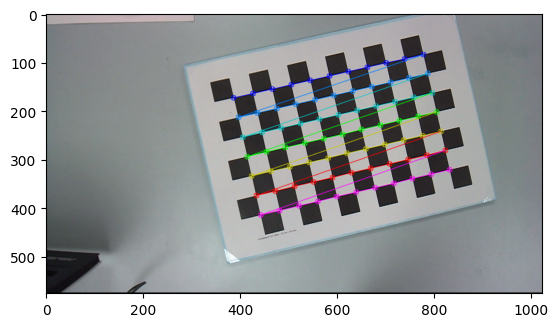

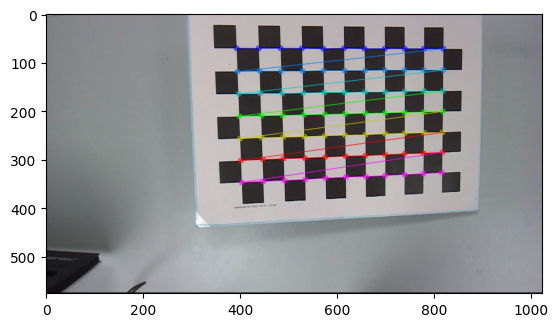

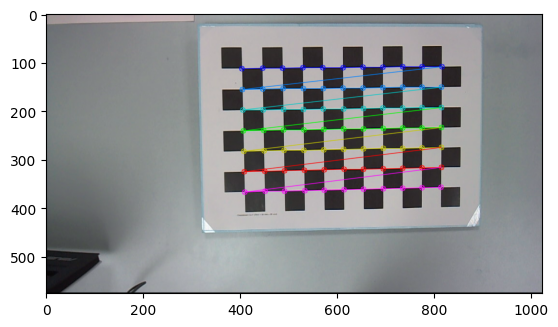

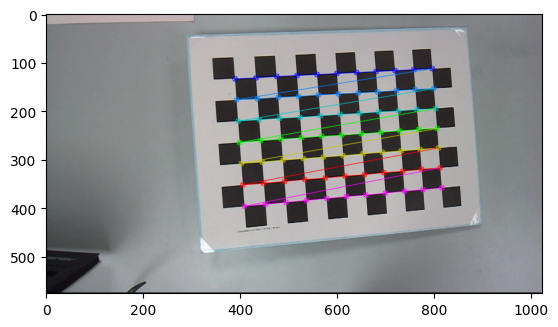

In [44]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((11*7,3), np.float32)
objp[:,:2] = np.mgrid[0:11,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('./imgs/input/*.png')

for fname in images:
    img = cv.imread(fname)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners1 = cv.findChessboardCorners(img, (11,7))

    if ret:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners1, (4,4), (-1,-1), criteria)
        imgpoints.append(corners2)
        
        cv.drawChessboardCorners(img, (11, 7), corners2, ret)
        plt.imshow(img)
        plt.show()


### Calibrate

In [45]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [46]:
for img_path in images:
    img = cv.imread(img_path)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    cv.imwrite(img_path.replace('input', 'output'), dst)

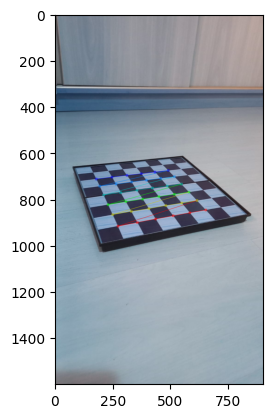

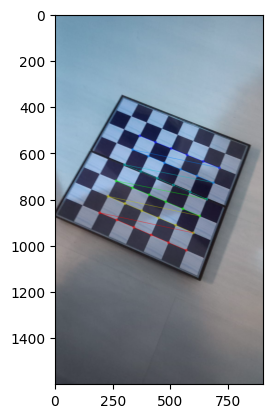

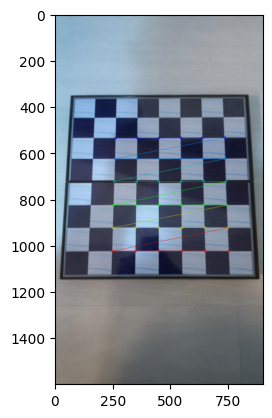

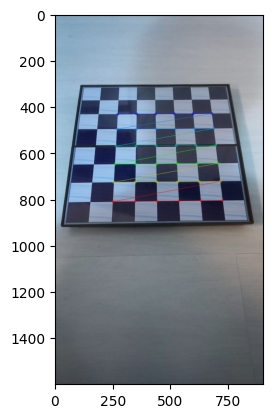

In [56]:
import numpy as np
import cv2 as cv
import glob
from matplotlib import pyplot as plt

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('./new-img/input/*.jpeg')

for fname in images:
    img = cv.imread(fname)


    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners1 = cv.findChessboardCorners(img, (6,6))

    if ret:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners1, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        
        cv.drawChessboardCorners(img, (6, 6), corners2, ret)
        plt.imshow(img)
        plt.show()


In [57]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [58]:
for img_path in images:
    img = cv.imread(img_path)
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    cv.imwrite(img_path.replace('input', 'output'), dst)

In [60]:
import os

In [61]:
src_path = '/home/cristiano/visao-computacional/camera_calibration/new-img/'

In [63]:
cont = 1  
for file in os.listdir('/home/cristiano/visao-computacional/camera_calibration/new-img/input/'):
    # rename files with cont name
    os.rename(src_path + 'input/' + file, src_path + 'input/' + str(cont) + '.jpeg')
    cont += 1